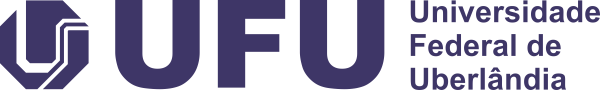

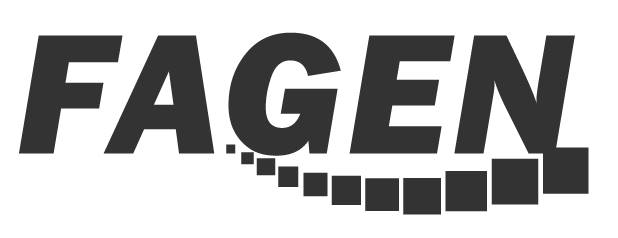

# <center> <b>Análise de Dados IV</b> </center>
## <center> <b>Análise descritiva de dados</b> </center>
## <center> Gabriel Henrique Alves Silva 11911GIN013 </center>
## <center> Thiago Cardoso Arcanjo 11621GIN020</center>

# Bibliotecas Utilizadas

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
import numpy as np

from statsmodels.graphics.gofplots import qqplot

from scipy import stats as st

import researchpy as rs

from sklearn.preprocessing import StandardScaler

import locale

#locale.setlocale(locale.LC_ALL, '')
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Dados
Os dados estudados são referentes ao saneamento básico de todos os municípios do estado de Minas Gerais dos anos de 2010 a 2016. Cada linha da tabela representa uma cidade, cada municipio pode ocupar até 7 linhas da tabela, representando os anos mensurados na base, algumas cidades podem não tem registros de alguns anos.

In [70]:
df = pd.read_excel(r"C:\Users\User\Downloads\SANEAMENTO_MG_BASE_FINAL_2010_2016.xlsx", sheet_name = "BASE_FINAL_2010_2016")

In [71]:
print("Todas as variáveis da base de dados: \n")
list(df.columns)

Todas as variáveis da base de dados: 



['Código do Município',
 'Ano de Referência',
 'NOME_MUNICIPIO',
 'Código da Mesorregião (IBGE)',
 'Nome da Mesorregião',
 'Código da Microrregião (IBGE)',
 'Nome da Microrregião',
 'PORTE_MUN - Porte do Município Baseado na População',
 'POP_TOT - População total do município do ano de referência (Fonte: IBGE): (Habitantes)',
 'POP_URB - População urbana do município do ano de referência (Fonte: IBGE): (Habitantes)',
 'UF',
 'ATENCAO_BASICA - Valor Liquidado com a Atenção Básica',
 'ATENCAO_BASICA_PERCAPTA',
 'INTERNACOES - Quantidade de Internações por Docenças Infecciosas Intestinais',
 'INTERNACOES - por 1000 Habitantes',
 'VALOR_GASTO - Valor Gasto com Internações',
 'VALOR_GASTO PERCAPTA - Valor Gasto com Internações',
 'OBITOS - Morbidade Hospitalar Decorrentes das Internações por Doenças Infecciosas Intestinais',
 'TAXA_MORTALIDADE - Taxa de Mortalidade - OBITOS / INTERNACOES',
 'AGUA - Prestador do Serviço de Água',
 'ESGOTO - Prestador do Serviço de Esgoto',
 'AGUA_NATUREZA -

## Cidades mineiras

In [72]:
print("Cidades mineiras presentes na base de dados:\n")
df['NOME_MUNICIPIO'].unique().tolist()

Cidades mineiras presentes na base de dados:



['Abadia dos Dourados',
 'Abaeté',
 'Abre Campo',
 'Acaiaca',
 'Açucena',
 'Água Boa',
 'Água Comprida',
 'Aguanil',
 'Águas Formosas',
 'Águas Vermelhas',
 'Aimorés',
 'Aiuruoca',
 'Alagoa',
 'Albertina',
 'Além Paraíba',
 'Alfenas',
 'Alfredo Vasconcelos',
 'Almenara',
 'Alpercata',
 'Alpinópolis',
 'Alterosa',
 'Alto Caparaó',
 'Alto Rio Doce',
 'Alvarenga',
 'Alvinópolis',
 'Alvorada de Minas',
 'Amparo do Serra',
 'Andradas',
 'Cachoeira de Pajeú',
 'Andrelândia',
 'Angelândia',
 'Antônio Carlos',
 'Antônio Dias',
 'Antônio Prado de Minas',
 'Araçaí',
 'Araçuaí',
 'Araguari',
 'Arantina',
 'Araponga',
 'Araporã',
 'Araújos',
 'Araxá',
 'Arceburgo',
 'Arcos',
 'Areado',
 'Argirita',
 'Aricanduva',
 'Arinos',
 'Astolfo Dutra',
 'Ataléia',
 'Augusto de Lima',
 'Baependi',
 'Baldim',
 'Bambuí',
 'Bandeira',
 'Bandeira do Sul',
 'Barão de Cocais',
 'Barão de Monte Alto',
 'Barbacena',
 'Barra Longa',
 'Barroso',
 'Bela Vista de Minas',
 'Belmiro Braga',
 'Belo Horizonte',
 'Belo Orient

In [73]:
def cidades_da_base(df):
    arr=[]
    for cidade in df['NOME_MUNICIPIO']:
        if cidade not in arr:
            arr.append(cidade)
    return arr

cidades=cidades_da_base(df)
cidades = [cidade.replace("-", " ") for cidade in cidades]   #Algumas cidades tem seu nome separado por "-" ao invés de espaço

soma_cidades=len(cidades)

In [74]:
print(f"A base de dados tem {soma_cidades} cidades mineiras.")

A base de dados tem 843 cidades mineiras.


Tendo em vista que Minas Gerais tem 853 cidaes, vamos descobrir quais cidades não estão na base de dados. Como o número de cidades é muito alto, torna-se inviável comparação utilizando listas como estrutura de dados principal para busca, será somente auxiliar neste caso. Utilizaremos árvores pois sua busca é bem mais rápida, facilitando a comparação.

In [75]:
class NO:
    def __init__(self, info):
        self.info = info
        self.esquerda = None
        self.direita = None
        

class ArvBin:
    def __init__ (self):
       self.__raiz = None

    def insere(self, valor):
        novo = NO(valor)

        if(self.__raiz == None):
            self.__raiz = novo
        else:
            atual = self.__raiz
            ant = None
            while(atual != None):
                ant = atual
                if(valor > atual.info):
                    atual = atual.direita
                elif (valor < atual.info):
                    atual = atual.esquerda
                else:
                    return False
            if(valor > ant.info):
                ant.direita = novo
            else:
                ant.esquerda = novo
        return True

    # Busca por um elemento na árvore binária
    def busca(self, valor):
        if(self.__raiz == None):
            return False
        # Define-se que o nó atual (e inicial) é a raiz da árvore.
        atual = self.__raiz
        # Percurso:  nó diferente de nulo
        while(atual != None):
            if(valor == atual.info):  #se acha valor procurado, encerra com TRUE
                return True
            if(valor > atual.info):   #senão nó atual recebe seu filho à esquerda ou direita
                atual = atual.direita
            else:
                atual = atual.esquerda

        return False
    


In [76]:
arvore = ArvBin()

for cidade in cidades:
    arvore.insere(cidade)    


In [77]:
cidades_verificadas = ["Abadia dos Dourados", "Abaeté", "Abre Campo", "Acaiaca", "Açucena", "Água Boa", "Água Comprida", "Aguanil", "Águas Formosas", "Águas Vermelhas", "Aimorés", "Aiuruoca", "Alagoa", "Albertina", "Além Paraíba", "Alfenas", "Alfredo Vasconcelos", "Almenara", "Alpercata", "Alpinópolis", "Alterosa", "Alto Caparaó", "Alto Jequitibá", "Alto Rio Doce", "Alvarenga", "Alvinópolis", "Alvorada de Minas", "Amparo do Serra", "Andradas", "Andrelândia", "Angelândia", "Antônio Carlos", "Antônio Dias", "Antônio Prado de Minas", "Araçaí", "Aracitaba", "Araçuaí", "Araguari", "Arantina", "Araponga", "Araporã", "Arapuá", "Araújos", "Araxá", "Arceburgo", "Arcos", "Areado", "Argirita", "Aricanduva", "Arinos", "Astolfo Dutra", "Ataléia", "Augusto de Lima", "Baependi", "Baldim", "Bambuí", "Bandeira", "Bandeira do Sul", "Barão de Cocais", "Barão de Monte Alto", "Barbacena", "Barra Longa", "Barroso", "Bela Vista de Minas", "Belmiro Braga", "Belo Horizonte", "Belo Oriente", "Belo Vale", "Berilo", "Berizal", "Bertópolis", "Betim", "Bias Fortes", "Bicas", "Biquinhas", "Boa Esperança", "Bocaina de Minas", "Bocaiúva", "Bom Despacho", "Bom Jardim de Minas", "Bom Jesus da Penha", "Bom Jesus do Amparo", "Bom Jesus do Galho", "Bom Repouso", "Bom Sucesso", "Bonfim", "Bonfinópolis de Minas", "Bonito de Minas", "Borda da Mata", "Botelhos", "Botumirim", "Brás Pires", "Brasilândia de Minas", "Brasília de Minas", "Braúnas", "Brasópolis", "Brumadinho", "Bueno Brandão", "Buenópolis", "Bugre", "Buritis", "Buritizeiro", "Cabeceira Grande", "Cabo Verde", "Cachoeira da Prata", "Cachoeira de Minas", "Cachoeira de Pajeú", "Cachoeira Dourada", "Caetanópolis", "Caeté", "Caiana", "Cajuri", "Caldas", "Camacho", "Camanducaia", "Cambuí", "Cambuquira", "Campanário", "Campanha", "Campestre", "Campina Verde", "Campo Azul", "Campo Belo", "Campo do Meio", "Campo Florido", "Campos Altos", "Campos Gerais", "Cana Verde", "Canaã", "Canápolis", "Candeias", "Cantagalo", "Caparaó", "Capela Nova", "Capelinha", "Capetinga", "Capim Branco", "Capinópolis", "Capitão Andrade", "Capitão Enéas", "Capitólio", "Caputira", "Caraí", "Caranaíba", "Carandaí", "Carangola", "Caratinga", "Carbonita", "Careaçu", "Carlos Chagas", "Carmésia", "Carmo da Cachoeira", "Carmo da Mata", "Carmo de Minas", "Carmo do Cajuru", "Carmo do Paranaíba", "Carmo do Rio Claro", "Carmópolis de Minas", "Carneirinho", "Carrancas", "Carvalhópolis", "Carvalhos", "Casa Grande", "Cascalho Rico", "Cássia", "Cataguases", "Catas Altas", "Catas Altas da Noruega", "Catuji", "Catuti", "Caxambu", "Cedro do Abaeté", "Central de Minas", "Centralina", "Chácara", "Chalé", "Chapada do Norte", "Chapada Gaúcha", "Chiador", "Cipotânea", "Claraval", "Claro dos Poções", "Cláudio", "Coimbra", "Coluna", "Comendador Gomes", "Comercinho", "Conceição da Aparecida", "Conceição da Barra de Minas", "Conceição das Alagoas", "Conceição das Pedras", "Conceição de Ipanema", "Conceição do Mato Dentro", "Conceição do Pará", "Conceição do Rio Verde", "Conceição dos Ouros", "Cônego Marinho", "Confins", "Congonhal", "Congonhas", "Congonhas do Norte", "Conquista", "Conselheiro Lafaiete", "Conselheiro Pena", "Consolação", "Contagem", "Coqueiral", "Coração de Jesus", "Cordisburgo", "Cordislândia", "Corinto", "Coroaci", "Coromandel", "Coronel Fabriciano", "Coronel Murta", "Coronel Pacheco", "Coronel Xavier Chaves", "Córrego Danta", "Córrego do Bom Jesus", "Córrego Fundo", "Córrego Novo", "Couto de Magalhães de Minas", "Crisólita", "Cristais", "Cristália", "Cristiano Otoni", "Cristina", "Crucilândia", "Cruzeiro da Fortaleza", "Cruzília", "Cuparaque", "Curral de Dentro", "Curvelo", "Datas", "Delfim Moreira", "Delfinópolis", "Delta", "Descoberto", "Desterro de Entre Rios", "Desterro do Melo", "Diamantina", "Diogo de Vasconcelos", "Dionísio", "Divinésia", "Divino", "Divino das Laranjeiras", "Divinolândia de Minas", "Divinópolis", "Divisa Alegre", "Divisa Nova", "Divisópolis", "Dom Bosco", "Dom Cavati", "Dom Joaquim", "Dom Silvério", "Dom Viçoso", "Dona Eusébia", "Dores de Campos", "Dores de Guanhães", "Dores do Indaiá", "Dores do Turvo", "Doresópolis", "Douradoquara", "Durandé", "Elói Mendes", "Engenheiro Caldas", "Engenheiro Navarro", "Entre Folhas", "Entre Rios de Minas", "Ervália", "Esmeraldas", "Espera Feliz", "Espinosa", "Espírito Santo do Dourado", "Estiva", "Estrela Dalva", "Estrela do Indaiá", "Estrela do Sul", "Eugenópolis", "Ewbank da Câmara", "Extrema", "Fama", "Faria Lemos", "Felício dos Santos", "Felisburgo", "Felixlândia", "Fernandes Tourinho", "Ferros", "Fervedouro", "Florestal", "Formiga","Formoso", "Fortaleza de Minas", "Fortuna de Minas", "Francisco Badaró", "Francisco Dumont", "Francisco Sá", "Franciscópolis", "Frei Gaspar", "Frei Inocêncio", "Frei Lagonegro", "Fronteira", "Fronteira dos Vales", "Fruta de Leite", "Frutal", "Funilândia", "Galiléia", "Gameleiras", "Glaucilândia", "Goiabeira", "Goianá", "Gonçalves", "Gonzaga", "Gouveia", "Governador Valadares", "Grão Mogol", "Grupiara", "Guanhães", "Guapé", "Guaraciaba", "Guaraciama", "Guaranésia", "Guarani", "Guarará", "Guarda-Mor", "Guaxupé", "Guidoval", "Guimarânia", "Guiricema", "Gurinhatã", "Heliodora", "Iapu", "Ibertioga", "Ibiá", "Ibiaí", "Ibiracatu", "Ibiraci", "Ibirité", "Ibitiúra de Minas", "Ibituruna", "Icaraí de Minas", "Igarapé", "Igaratinga", "Iguatama", "Ijaci", "Ilicínea", "Imbé de Minas", "Inconfidentes", "Indaiabira", "Indianópolis", "Ingaí", "Inhapim", "Inhaúma", "Inimutaba", "Ipaba", "Ipanema", "Ipatinga", "Ipiaçu", "Ipuiúna", "Iraí de Minas", "Itabira", "Itabirinha", "Itabirito", "Itacambira", "Itacarambi", "Itaguara", "Itaipé", "Itajubá", "Itamarandiba", "Itamarati de Minas", "Itambacuri", "Itambé do Mato Dentro", "Itamogi", "Itamonte", "Itanhandu", "Itanhomi", "Itaobim", "Itapagipe", "Itapecerica", "Itapeva", "Itatiaiuçu", "Itaú de Minas", "Itaúna", "Itaverava", "Itinga", "Itueta", "Ituiutaba", "Itumirim", "Iturama", "Itutinga", "Jaboticatubas", "Jacinto", "Jacuí", "Jacutinga", "Jaguaraçu", "Jaíba", "Jampruca", "Janaúba", "Januária", "Japaraíba", "Japonvar", "Jeceaba", "Jenipapo de Minas", "Jequeri", "Jequitaí", "Jequitibá", "Jequitinhonha", "Jesuânia", "Joaíma", "Joanésia", "João Monlevade", "João Pinheiro", "Joaquim Felício", "Jordânia", "José Gonçalves de Minas", "José Raydan", "Josenópolis", "Juatuba", "Juiz de Fora", "Juramento", "Juruaia", "Juvenília", "Ladainha", "Lagamar", "Lagoa da Prata", "Lagoa dos Patos", "Lagoa Dourada", "Lagoa Formosa", "Lagoa Grande", "Lagoa Santa", "Lajinha", "Lambari", "Lamim", "Laranjal", "Lassance", "Lavras", "Leandro Ferreira", "Leme do Prado", "Leopoldina", "Liberdade", "Lima Duarte", "Limeira do Oeste", "Lontra", "Luisburgo", "Luislândia", "Luminárias", "Luz", "Machacalis", "Machado", "Madre de Deus de Minas", "Malacacheta", "Mamonas", "Manga", "Manhuaçu", "Manhumirim", "Mantena", "Mar de Espanha", "Maravilhas", "Maria da Fé", "Mariana", "Marilac", "Mário Campos", "Maripá de Minas", "Marliéria", "Marmelópolis", "Martinho Campos", "Martins Soares", "Mata Verde", "Materlândia", "Mateus Leme", "Mathias Lobato", "Matias Barbosa", "Matias Cardoso", "Matipó", "Mato Verde", "Matozinhos", "Matutina", "Medeiros", "Medina", "Mendes Pimentel", "Mercês", "Mesquita", "Minas Novas", "Minduri", "Mirabela", "Miradouro", "Miraí", "Miravânia", "Moeda", "Moema", "Monjolos", "Monsenhor Paulo", "Montalvânia", "Monte Alegre de Minas", "Monte Azul", "Monte Belo", "Monte Carmelo", "Monte Formoso", "Monte Santo de Minas", "Monte Sião", "Montes Claros", "Montezuma", "Morada Nova de Minas", "Morro da Garça", "Morro do Pilar", "Munhoz", "Muriaé", "Mutum", "Muzambinho","Nacip Raydan", "Nanuque", "Naque", "Natalândia", "Natércia", "Nazareno", "Nepomuceno", "Ninheira", "Nova Belém", "Nova Era", "Nova Lima", "Nova Módica", "Nova Ponte", "Nova Porteirinha", "Nova Resende", "Nova Serrana", "Nova União", "Novo Cruzeiro", "Novo Oriente de Minas", "Novorizonte", "Olaria", "Olhos D'Água", "Olímpio Noronha", "Oliveira", "Oliveira Fortes", "Onça de Pitangui", "Oratórios", "Orizânia", "Ouro Branco", "Ouro Fino", "Ouro Preto", "Ouro Verde de Minas", "Padre Carvalho", "Padre Paraíso", "Pai Pedro", "Paineiras", "Pains", "Paiva", "Palma", "Palmópolis", "Papagaios", "Pará de Minas", "Paracatu", "Paraguaçu", "Paraisópolis", "Paraopeba", "Passa Quatro", "Passa Tempo", "Passa Vinte", "Passabém", "Passos", "Patis", "Patos de Minas", "Patrocínio", "Patrocínio do Muriaé", "Paula Cândido", "Paulistas", "Pavão", "Peçanha", "Pedra Azul", "Pedra Bonita", "Pedra do Anta", "Pedra do Indaiá", "Pedra Dourada", "Pedralva", "Pedras de Maria da Cruz","Pedrinópolis", "Pedro Leopoldo", "Pedro Teixeira", "Pequeri", "Pequi", "Perdigão", "Perdizes", "Perdões", "Periquito", "Pescador", "Piau", "Piedade de Caratinga", "Piedade de Ponte Nova", "Piedade do Rio Grande", "Piedade dos Gerais", "Pimenta", "Pingo D ÁGUA", "Pintópolis", "Piracema", "Pirajuba", "Piranga", "Piranguçu", "Piranguinho", "Pirapetinga", "Pirapora", "Piraúba", "Pitangui", "Piumhi", "Planura", "Poço Fundo", "Poços de Caldas", "Pocrane", "Pompéu", "Ponte Nova", "Ponto Chique", "Ponto dos Volantes", "Porteirinha", "Porto Firme", "Poté", "Pouso Alegre", "Pouso Alto", "Prados", "Prata", "Pratápolis", "Pratinha", "Presidente Bernardes", "Presidente Juscelino", "Presidente Kubitschek","Presidente Olegário", "Prudente de Morais", "Quartel Geral", "Queluzito", "Raposos", "Raul Soares", "Recreio", "Reduto", "Resende Costa", "Resplendor", "Ressaquinha", "Riachinho", "Riacho dos Machados", "Ribeirão das Neves", "Ribeirão Vermelho", "Rio Acima", "Rio Casca", "Rio do Prado", "Rio Doce", "Rio Espera", "Rio Manso", "Rio Novo", "Rio Paranaíba","Rio Pardo de Minas", "Rio Piracicaba", "Rio Pomba", "Rio Preto", "Rio Vermelho", "Ritápolis", "Rochedo de Minas", "Rodeiro", "Romaria", "Rosário da Limeira", "Rubelita", "Rubim","Sabará", "Sabinópolis", "Sacramento", "Salinas", "Salto da Divisa", "Santa Bárbara", "Santa Bárbara do Leste", "Santa Bárbara do Monte Verde", "Santa Bárbara do Tugúrio", "Santa Cruz de Minas", "Santa Cruz de Salinas"]
cidades_verificadas = [cidade.replace("-", " ") for cidade in cidades_verificadas]

cidades_verificadas2=["Santa Cruz do Escalvado","Sabará", "Sabinópolis", "Sacramento", "Salinas", "Salto da Divisa", "Santa Bárbara", "Santa Bárbara do Leste", "Santa Bárbara do Monte Verde", "Santa Bárbara do Tugúrio", "Santa Cruz de Minas", "Santa Cruz de Salinas", "Santa Cruz do Escalvado", "Santa Efigênia de Minas", "Santa Fé de Minas", "Santa Helena de Minas", "Santa Juliana", "Santa Luzia", "Santa Margarida", "Santa Maria de Itabira", "Santa Maria do Salto", "Santa Maria do Suaçuí", "Santa Rita de Caldas", "Santa Rita de Jacutinga", "Santa Rita de Minas", "Santa Rita de Ibitipoca", "Santa Rita do Itueto", "Santa Rita do Sapucaí", "Santa Rosa da Serra", "Santa Vitória", "Santana da Vargem", "Santana de Cataguases", "Santana de Pirapama", "Santana do Deserto", "Santana do Garambéu", "Santana do Jacaré", "Santana do Manhuaçu", "Santana do Paraíso", "Santana do Riacho", "Santana dos Montes", "Santo Antônio do Amparo", "Santo Antônio do Aventureiro", "Santo Antônio do Grama", "Santo Antônio do Itambé", "Santo Antônio do Jacinto", "Santo Antônio do Monte", "Santo Antônio do Retiro", "Santo Hipólito", "Santos Dumont", "São Bento Abade", "São Brás do Suaçuí", "São Domingos das Dores", "São Domingos do Prata", "São Félix de Minas", "São Francisco", "São Francisco de Paula", "São Francisco de Sales", "São Francisco do Glória", "São Geraldo", "São Geraldo da Piedade", "São Geraldo do Baixio", "São Gonçalo do Abaeté", "São Gonçalo do Pará", "São Gonçalo do Rio Abaixo", "São Gonçalo do Rio Preto", "São Gonçalo do Sapucaí", "São Gotardo", "São João Batista do Glória", "São João da Lagoa", "São João da Mata", "São João da Ponte", "São João das Missões", "São João del Rei", "São João do Manhuaçu", "São João do Manteninha", "São João do Oriente", "São João do Pacuí", "São João do Paraíso", "São João Evangelista", "São João Nepomuceno", "São Joaquim de Bicas", "São José da Barra", "São José da Lapa", "São José da Safira", "São José da Varginha", "São José do Alegre", "São José do Divino", "São José do Goiabal", "São José do Jacuri", "São José do Mantimento", "São Lourenço", "São Miguel do Anta", "São Pedro da União", "São Pedro do Suaçuí", "São Pedro dos Ferros", "São Romão", "São Roque de Minas", "São Sebastião da Bela Vista", "São Sebastião da Vargem Alegre", "São Sebastião do Anta", "São Sebastião do Maranhão", "São Sebastião do Oeste", "São Sebastião do Paraíso", "São Sebastião do Rio Preto", "São Sebastião do Rio Verde", "São Thomé das Letras","São Tiago", "São Tomás de Aquino", "São Vicente de Minas", "Sapucaí-Mirim", "Sardoá", "Sarzedo", "Sem Peixe", "Senador Amaral", "Senador Cortes", "Senador Firmino", "Senador José Bento", "Senador Modestino Gonçalves", "Senhora de Oliveira", "Senhora do Porto", "Senhora dos Remédios", "Sericita", "Seritinga", "Serra Azul de Minas", "Serra da Saudade", "Serra do Salitre", "Serra dos Aimorés", "Serrania", "Serranópolis de Minas", "Serranos", "Serro", "Sete Lagoas", "Setubinha", "Silveirânia", "Silvianópolis", "Simão Pereira", "Simonésia", "Sobrália", "Soledade de Minas", "Tabuleiro", "Taiobeiras", "Taparuba", "Tapira", "Tapiraí", "Taquaraçu de Minas", "Tarumirim", "Teixeiras", "Teófilo Otoni", "Timóteo", "Tiradentes", "Tiros", "Tocantins", "Tocos do Moji", "Toledo", "Tombos", "Três Corações", "Três Marias", "Três Pontas", "Tumiritinga", "Tupaciguara", "Turmalina", "Turvolândia", "Ubá", "Ubaí", "Ubaporanga", "Uberaba", "Uberlândia", "Umburatiba", "Unaí", "União de Minas", "Uruana de Minas", "Urucânia", "Urucuia", "Vargem Alegre", "Vargem Bonita", "Vargem Grande do Rio Pardo", "Varginha", "Varjão de Minas", "Várzea da Palma", "Varzelândia", "Vazante", "Verdelândia", "Veredinha", "Veríssimo", "Vermelho Novo", "Vespasiano", "Viçosa", "Vieiras", "Virgem da Lapa", "Virgínia", "Virginópolis", "Virgolândia", "Visconde do Rio Branco", "Volta Grande", "Wenceslau Braz"]
cidades_verificadas2 = [cidade.replace("-", " ") for cidade in cidades_verificadas2]

cidades_nao_presentes=[]

for i in cidades_verificadas:
    if arvore.busca(i) == False:         
        cidades_nao_presentes.append(i)
for j in cidades_verificadas2:
    if arvore.busca(j) == False:
        cidades_nao_presentes.append(j)

        
print(f"A base de dados tem", len(cidades_nao_presentes) ,"cidades faltantes.\n")
print("Cidades mineiras que não estão presentes na base de dados:")
print(cidades_nao_presentes)
cidades_faltantes=len(cidades_nao_presentes)


A base de dados tem 10 cidades faltantes.

Cidades mineiras que não estão presentes na base de dados:
['Aracitaba', 'Arapuá', 'Bocaina de Minas', 'Dom Bosco', 'Galiléia', 'Monte Alegre de Minas', "Olhos D'Água", 'Pedro Teixeira', 'Pouso Alto', 'Romaria']


## Abastecimento de água

Analisaremos a cobertura do abastecimento de água por mesorregião

In [78]:
print(f"Minas Gerais tem {len(df['Nome da Mesorregião'].unique())} mesorregiões\n")

print("População total atendida com abastecimento de água por mesorregião em habitantes:\n")
var1 = df.groupby('Nome da Mesorregião')['AG001 - População total atendida com abastecimento de água (Habitantes)'].sum()
print(var1,"\n")

print(f"A mesorregião com o maior número de população atendida por abastecimento de água é {var1.idxmax()}, com {var1.max()} habitantes.\n")

print(f"A mesorregião com o menor número de população atendida por abastecimento de água é {var1.idxmin()}, com {var1.min()} habitantes.")



Minas Gerais tem 12 mesorregiões

População total atendida com abastecimento de água por mesorregião em habitantes:

Nome da Mesorregião
Campo das Vertentes                  2939889.0
Central Mineira                      2488028.0
Jequitinhonha                        3356543.0
Metropolitana de Belo Horizonte     42164537.0
Noroeste de Minas                    2016480.0
Norte de Minas                       7934036.0
Oeste de Minas                       6131673.0
Sul/Sudoeste de Minas               14081372.0
Triângulo Mineiro/Alto Paranaíba    14477337.0
Vale do Mucuri                       1951566.0
Vale do Rio Doce                     9084619.0
Zona da Mata                        12486088.0
Name: AG001 - População total atendida com abastecimento de água (Habitantes), dtype: float64 

A mesorregião com o maior número de população atendida por abastecimento de água é Metropolitana de Belo Horizonte, com 42164537.0 habitantes.

A mesorregião com o menor número de população atendida por 

In [79]:
print("População urbana atendida por abastecimento de água das mesorregiões em habitantes:\n")
var2 = df.groupby('Nome da Mesorregião')['AG026 - População urbana atendida com abastecimento de água (Habitantes)'].sum()
print(var2,"\n")
print(f"A mesorregião com o maior população urbana atendida por abastecimento de água é {var2.idxmax()}, com {var2.max()} habitantes.\n")
print(f"A mesorregião com o menor população urbana atendida por abastecimento de água é {var2.idxmin()}, com {var2.min()} habitantes.")

População urbana atendida por abastecimento de água das mesorregiões em habitantes:

Nome da Mesorregião
Campo das Vertentes                  2835764.0
Central Mineira                      2481408.0
Jequitinhonha                        3012875.0
Metropolitana de Belo Horizonte     41784746.0
Noroeste de Minas                    1986440.0
Norte de Minas                       7745980.0
Oeste de Minas                       5963046.0
Sul/Sudoeste de Minas               13794759.0
Triângulo Mineiro/Alto Paranaíba    14091533.0
Vale do Mucuri                       1797515.0
Vale do Rio Doce                     8818385.0
Zona da Mata                        12162774.0
Name: AG026 - População urbana atendida com abastecimento de água (Habitantes), dtype: float64 

A mesorregião com o maior população urbana atendida por abastecimento de água é Metropolitana de Belo Horizonte, com 41784746.0 habitantes.

A mesorregião com o menor população urbana atendida por abastecimento de água é Vale do Mucur

In [80]:
print("População total das mesorregiões em habitantes:\n")
var3 = df.groupby('Nome da Mesorregião')['POP_TOT - População total do município do ano de referência (Fonte: IBGE): (Habitantes)'].sum()
print(var3,"\n")
print(f"A mesorregião com o maior população total é {var3.idxmax()}, com {var3.max()} habitantes.\n")
print(f"A mesorregião com o menor população total é {var3.idxmin()}, com {var3.min()} habitantes.")
#var3 =    #soma população total da mesorregião ...

População total das mesorregiões em habitantes:

Nome da Mesorregião
Campo das Vertentes                  3847449
Central Mineira                      2898130
Jequitinhonha                        4926747
Metropolitana de Belo Horizonte     44863310
Noroeste de Minas                    2595220
Norte de Minas                      11457082
Oeste de Minas                       6831045
Sul/Sudoeste de Minas               17095890
Triângulo Mineiro/Alto Paranaíba    15488230
Vale do Mucuri                       2753676
Vale do Rio Doce                    11347220
Zona da Mata                        15321550
Name: POP_TOT - População total do município do ano de referência (Fonte: IBGE): (Habitantes), dtype: int64 

A mesorregião com o maior população total é Metropolitana de Belo Horizonte, com 44863310 habitantes.

A mesorregião com o menor população total é Noroeste de Minas, com 2595220 habitantes.


Nota-se que a região com menor população total (Noroeste de Minas) não é a que tem o menor número de população atendida por abastecimento de água (Vale do Mucuri), o mesmo não acontece para a maior (Metropolitana de Belo Horizonte).

Dê um duplo clique na figura e controle a barra lateral para melhor visualização do gráfico


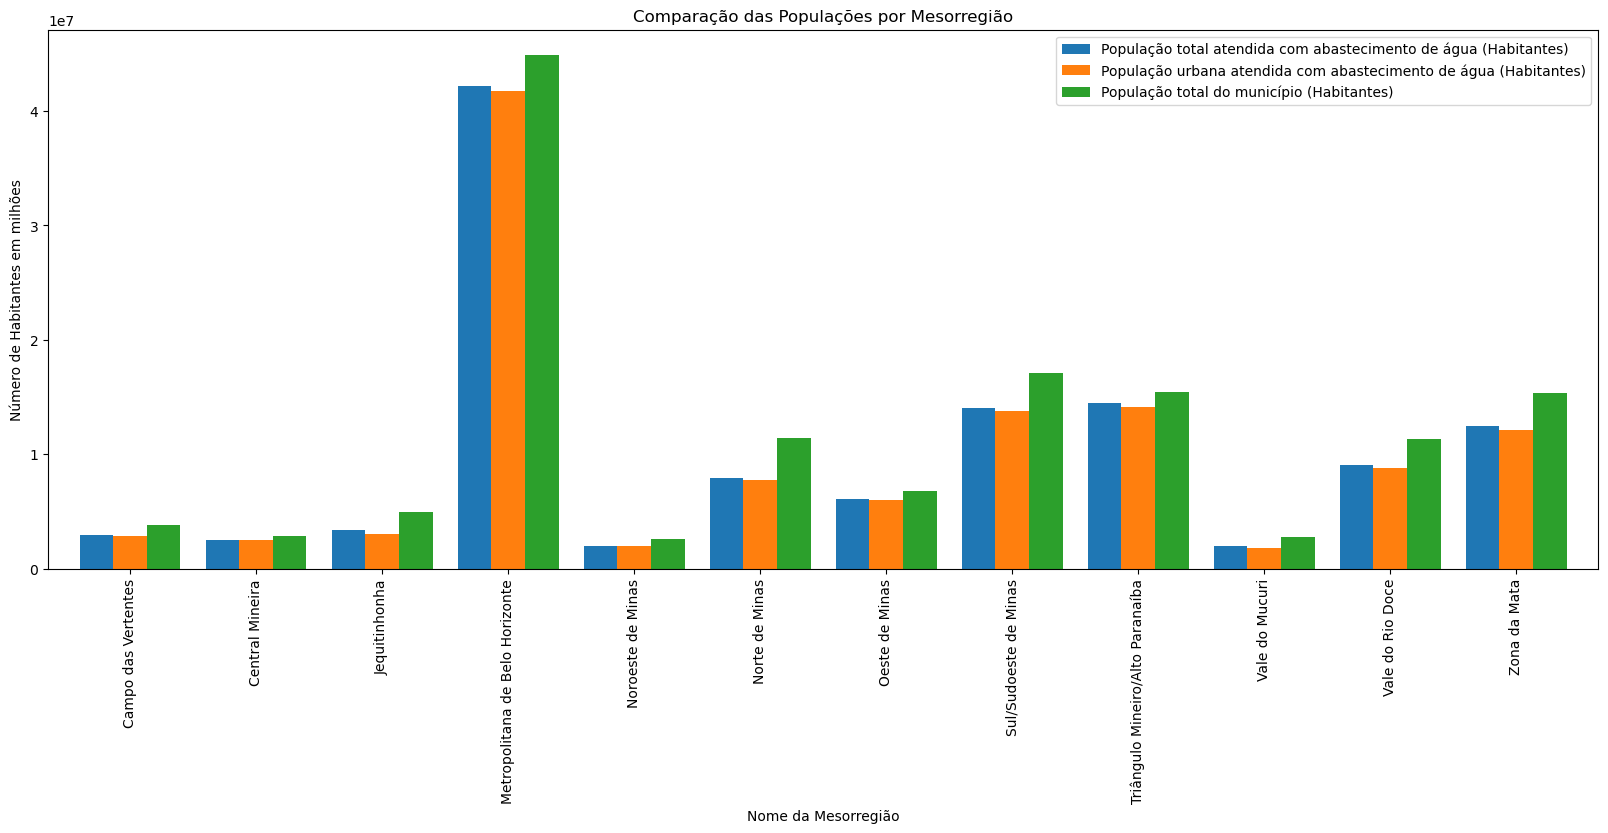

In [81]:
print("Dê um duplo clique na figura e controle a barra lateral para melhor visualização do gráfico")
plt.rcParams["figure.figsize"] = (20, 6)

# Criando um DataFrame com as três variáveis
data = pd.DataFrame({
    'População total atendida com abastecimento de água (Habitantes)': var1,
    'População urbana atendida com abastecimento de água (Habitantes)': var2,
    'População total do município (Habitantes)': var3
})

# Plotando o gráfico de barras
ax = data.plot(kind='bar', width=0.8)

# Definindo os rótulos do eixo X
ax.set_xticklabels(data.index, minor=False)

# Adicionando título e rótulos dos eixos
plt.title('Comparação das Populações por Mesorregião')
plt.ylabel('Número de Habitantes em milhões')
plt.xlabel('Nome da Mesorregião')

# Exibindo o gráfico
plt.show()

Tendo em vista que a coluna "AG025A - População rural atendida com abastecimento de água no ano anterior ao de referência. (habitante)" da base de dados tem muitos valores nulos, iremos metrificar qual a população rural de cada mesorregião subtraindo o somatório da população total atendida com abastecimento de água das mesorregiões com o somatório da população urbana atendida.

In [82]:
pop_rural = var1 - var2
print(pop_rural)

Nome da Mesorregião
Campo das Vertentes                 104125.0
Central Mineira                       6620.0
Jequitinhonha                       343668.0
Metropolitana de Belo Horizonte     379791.0
Noroeste de Minas                    30040.0
Norte de Minas                      188056.0
Oeste de Minas                      168627.0
Sul/Sudoeste de Minas               286613.0
Triângulo Mineiro/Alto Paranaíba    385804.0
Vale do Mucuri                      154051.0
Vale do Rio Doce                    266234.0
Zona da Mata                        323314.0
dtype: float64


Dê um duplo clique na figura e controle a barra lateral para melhor visualização do gráfico


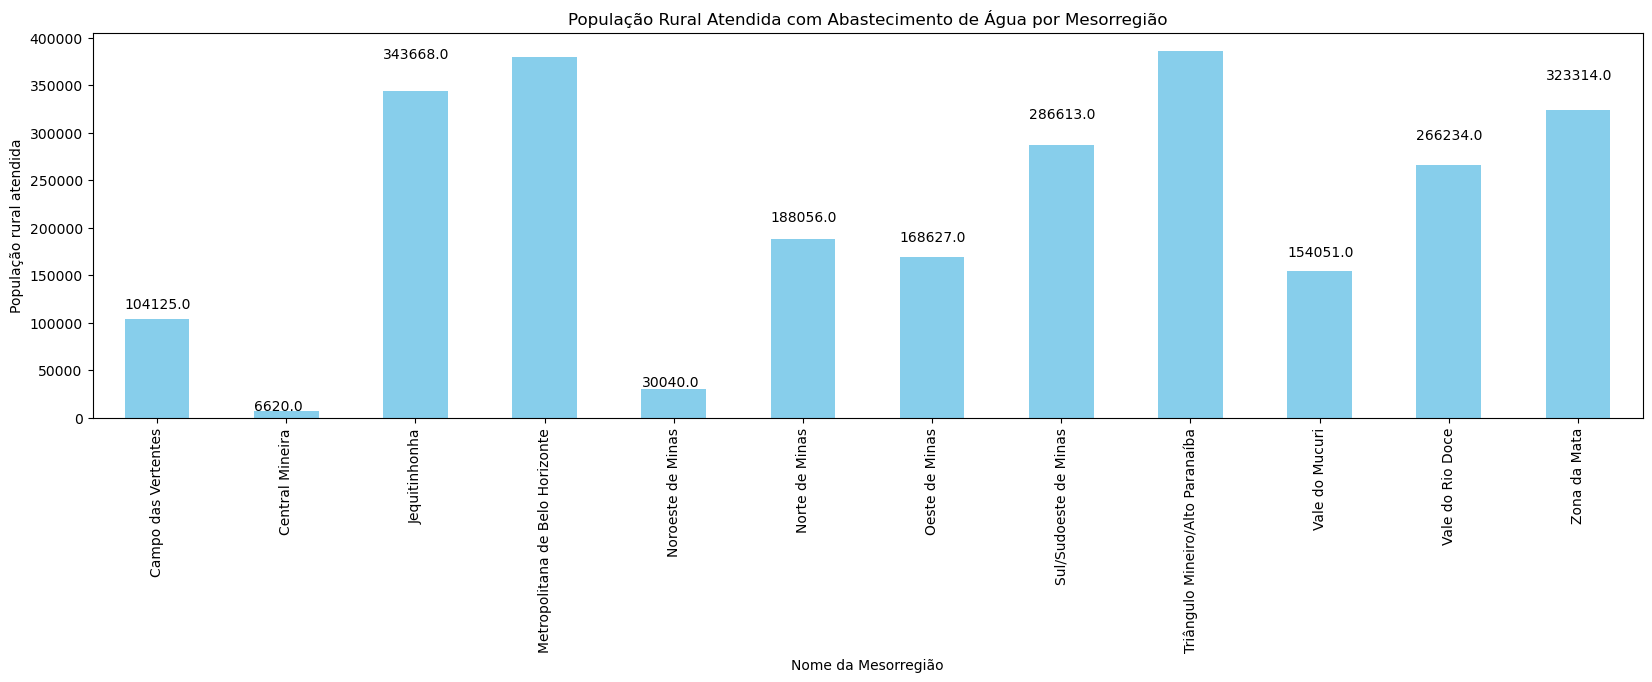

In [83]:
print("Dê um duplo clique na figura e controle a barra lateral para melhor visualização do gráfico")

plt.rcParams["figure.figsize"] = (20, 5)
ax = pop_rural.plot(kind='bar', color='skyblue')
ax.set_xticklabels(pop_rural.index, minor=False)
plt.title('População Rural Atendida com Abastecimento de Água por Mesorregião')
plt.ylabel('População rural atendida')
plt.xlabel('Nome da Mesorregião')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.10))